In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

m_raw = pd.read_table("http://www.groupes.polymtl.ca/log6308/Public/citeseer.rtable", sep=" ")
m = pd.read_table("http://www.groupes.polymtl.ca/log6308/Public/citeseer.rtable", sep=" ").values
mm = m.dot(m)

In [16]:
sums = np.sum(m, axis=1).reshape(-1,1)
markov = m*1.0 / sums

/Users/baptisterocca/Documents/utc/GI05_Montreal/LOG6308 syst.de.recom/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


In [17]:
print(markov)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [18]:
def pagerank(M, eps=1.0e-8, d=0.85):
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    last_v = np.ones((N, 1), dtype=np.float32) * 100
    M_hat = (d * M) + (((1 - d) / N) * np.ones((N, N), dtype=np.float32))
    
    while np.linalg.norm(v - last_v, 2) > eps:
        last_v = v
        v = np.matmul(M_hat, v)
    return v

In [19]:
index = m_raw.index.get_loc(422908)
out_ = np.argwhere(m[index,:]>0)
in_ = np.argwhere(m[:,index]>0)
total = np.unique(list(in_.flatten())+list(out_.flatten()))

pg = pagerank(markov)[total].flatten()
indexes = np.argsort(pg)[::-1]
indexes = indexes[~np.isnan(pg[indexes])]

suggestions_1 = set(m_raw.index[total[indexes]])

print(suggestions_1)

set([147460, 497542, 98185, 366858, 136975, 155792, 83730, 177173, 466838, 149673, 125089, 28323, 289188, 297641, 496938, 315693, 106034, 83509, 226359, 167226, 468667, 10302, 83263, 322240, 464834, 64835, 17094, 7624, 7099, 78418, 79188, 182742, 181463, 131548, 26170, 19422, 110303, 6497, 3170, 17507, 395364, 3175, 34792, 392298, 304747, 120172, 66285, 3950, 66291, 156791, 124, 139134, 96767])


In [20]:
index = m_raw.index.get_loc(422908)
out_ = np.argwhere(mm[index,:]>0)
in_ = np.argwhere(mm[:,index]>0)
total = np.unique(list(in_.flatten())+list(out_.flatten())+list(total))

pg = pagerank(markov)[total].flatten()
indexes = np.argsort(pg)[::-1]
indexes = indexes[~np.isnan(pg[indexes])]

suggestions_2 = set(m_raw.index[total[indexes]])

print(suggestions_2)

set([140292, 1347, 177173, 147460, 120860, 295968, 134177, 146468, 384037, 32294, 206892, 479277, 157742, 106034, 83509, 226359, 26170, 373307, 10302, 97863, 504401, 78418, 3170, 17507, 395364, 3175, 248936, 392298, 304747, 22638, 156791, 325396, 124, 314502, 155792, 58002, 488607, 125089, 296098, 28323, 149673, 129196, 248596, 468667, 322240, 17094, 181463, 110303, 134881, 425122, 66285, 50929, 66291, 293625, 70908, 366858, 136975, 83730, 103700, 7960, 26913, 164643, 8484, 496938, 315693, 35128, 167226, 149820, 83263, 166209, 64835, 28329, 79188, 426325, 53595, 312156, 167774, 6497, 212842, 120172, 3950, 210287, 139134, 53632, 8069, 497542, 98185, 126858, 155019, 48013, 206738, 10563, 225173, 466838, 289188, 113069, 188852, 449353, 7099, 464834, 313796, 40391, 7624, 63437, 182742, 131548, 19422, 225251, 70445, 34792, 399339, 297641, 429561, 422908, 301565, 96767])


In [21]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

item = m[index].reshape(1,-1)
cosine = cosine_similarity(m,item).reshape(-1)
indexes = np.argsort(cosine)[-11:-1][::-1]
suggestions_3 = set(m_raw.index[indexes])
print(suggestions_3)
print(cosine[indexes])

set([53632, 17507, 497542, 3175, 149673, 70445, 22638, 155792, 466838, 96767])
[0.51449576 0.49507377 0.48507125 0.48507125 0.45834925 0.45834925
 0.43386092 0.42874646 0.42008403 0.39605902]


In [22]:
euclidean = euclidean_distances(m,item).reshape(-1)
indexes = np.argsort(euclidean)[1:11]
suggestions_4 = set(m_raw.index[indexes])
print(suggestions_4)

set([53632, 17094, 497542, 149673, 70445, 155792, 8434, 225173, 466838, 96767])


In [23]:
print(set(m_raw.index[in_.flatten()]) & suggestions_1)

set([147460, 98185, 366858, 136975, 155792, 83730, 177173, 125089, 28323, 289188, 149673, 496938, 106034, 83509, 226359, 167226, 7099, 10302, 83263, 322240, 464834, 64835, 17094, 7624, 156791, 78418, 79188, 181463, 131548, 26170, 6497, 3170, 17507, 395364, 3175, 34792, 392298, 120172, 66285, 3950, 66291, 297641, 124, 139134, 96767])


In [24]:
common = suggestions_1 & suggestions_2 & suggestions_3 & suggestions_4
print(common)

set([155792, 149673, 466838, 497542, 96767])


0.666666666667
0.583333333333
0.5
0.25
0.25
0.0833333333333
0.0
0.0
0.0
0.0


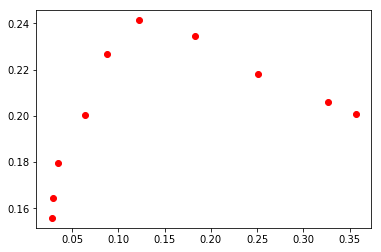

In [152]:
ptx, pty = [], []
for treshold in np.linspace(0.05,0.95,10):
    meanRap, meanPrec, nb = 0,0,0
    for i in range(len(m)):
        item = m[i].reshape(1,-1)
        if np.sum(item) == 0:
            continue
        
        out_ = np.argwhere(m[i,:]>0)
        in_ = np.argwhere(m[:,i]>0)
        total = np.unique(list(in_.flatten())+list(out_.flatten()))
        out_ = np.argwhere(mm[i,:]>0)
        in_ = np.argwhere(mm[:,i]>0)
        total = np.unique(list(in_.flatten())+list(out_.flatten())+list(total))
        goodSuggestions = set(total)
        
        cosine = cosine_similarity(m,item).reshape(-1)
        indexes = np.argwhere(cosine>=treshold).flatten()
        ourSuggestions = set(indexes)
        
        meanPrec += len(goodSuggestions & ourSuggestions)*1.0/len(ourSuggestions)
        meanRap += len(goodSuggestions & ourSuggestions)*1.0/len(goodSuggestions)
        nb += 1
    #print(treshold)
    print(len(goodSuggestions & ourSuggestions)*1.0/len(goodSuggestions))
    ptx.append(meanRap/nb)
    pty.append(meanPrec/nb)
      
plt.plot(ptx, pty, 'ro')
plt.show()

0.6666666666666666

8